In [34]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

#df = pd.read_csv("NYC_Collisions.csv", parse_dates=["Date"], index_col ="Date")
df = pd.read_csv("NYC_Collisions.csv")
# CONCAT TWO COLUMNS
df["DateTime"] = df["Date"]+" "+df["Time"]
# PARSE DATATIME
df["DateTime"] = pd.to_datetime(df["DateTime"])
print(df.columns)
print("\n------------\n")
print(df.info())
print("\n------------\n")
print(df.iloc[0])
print("\n------------\n")
# print("Null Date ", df['Date'].isnull().sum())
# print("Null Time ", df['Time'].isnull().sum())
# print("Null Cross Street ", df['Cross Street'].isnull().sum())
# print("Null Borough ", df['Borough'].isnull().sum())
# print("Null Latitude ", df['Latitude'].isnull().sum())
# print("Null Longitude ", df['Longitude'].isnull().sum())
# print("Null Contributing Factor ", df['Contributing Factor'].isnull().sum())
# print("Null Vehicle Type ", df['Vehicle Type'].isnull().sum())
# print("\n------------\n")
# DROP COLUMN: Cross Street
print("\nDROP COLUMN: Cross Street\n")
df.drop(["Cross Street"], axis =1, inplace = True)
# print(df.info())
# print("\n------------\n")
# DROP ALL NULLS
# print("\nDROP NULL\n")
# df.dropna(inplace=True)
# print(df.info())
# print("\n------------\n")
# print(df.loc[:0, ['Borough', 'Latitude', 'Longitude']])

Index(['Collision ID', 'Date', 'Time', 'Borough', 'Street Name',
       'Cross Street', 'Latitude', 'Longitude', 'Contributing Factor',
       'Vehicle Type', 'Persons Injured', 'Persons Killed',
       'Pedestrians Injured', 'Pedestrians Killed', 'Cyclists Injured',
       'Cyclists Killed', 'Motorists Injured', 'Motorists Killed', 'DateTime'],
      dtype='object')

------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238421 entries, 0 to 238420
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Collision ID         238421 non-null  int64         
 1   Date                 238421 non-null  object        
 2   Time                 238421 non-null  object        
 3   Borough              231224 non-null  object        
 4   Street Name          238058 non-null  object        
 5   Cross Street         111291 non-null  object        
 6   Latitude             216098 non-nul

In [35]:
# df.groupby(pd.Grouper(key='Date', freq='2YE')).sum()
# df.plot(kind = 'scatter', x = 'Date', y = 'Persons Killed')
# plt.show()
# df["Date"] = pd.to_datetime(df["Date"])
# df["Date"].head
# df2 = df.groupby(pd.Grouper(key='Date', freq='YE'))
# df.plot(x = 'Date', y = 'Persons Killed', figsize=(20, 10))
# plt.title('Scatter Plot')
# plt.show()
# df2 = killed_date.groupby(pd.Grouper(key='Date', freq='ME'))
# df2 = df.groupby([df.index.year])["Persons Killed"].sum()
# print(df.shape)
# df2 = df[["Date", "Persons Killed"]]
# print(df2.shape)
# df3 = df["Date"]
# print(df3.shape)
# df2.info()
# df.Date.info()

# print(persons_killed.shape)
# print(persons_killed)
# persons_killed.info()
vehicle_type = df.groupby(df["Vehicle Type"])["Vehicle Type"]
vehicle_type.describe()

count unique                     top    freq
Vehicle Type                                                         
Bicycle                   5533      1                 Bicycle    5533
Bus                       4197      1                     Bus    4197
Construction               894      1            Construction     894
Delivery Vehicle          1695      1        Delivery Vehicle    1695
Emergency Services        1823      1      Emergency Services    1823
Fire Services              196      1           Fire Services     196
Limousine                   97      1               Limousine      97
Motorcycle                2009      1              Motorcycle    2009
Not Reported              3126      1            Not Reported    3126
Other                     1321      1                   Other    1321
Other (Open Passenger)      16      1  Other (Open Passenger)      16
Passenger Vehicle       201842      1       Passenger Vehicle  201842
Scooter                   2137      1                 Scooter    2137
Taxi                      6015      1                    Taxi    6015
Transport                 6642      1               Transport    6642
Unknown                     22      1                 Unknown      22
Utility Vehicle            856      1         Utility Vehicle     856

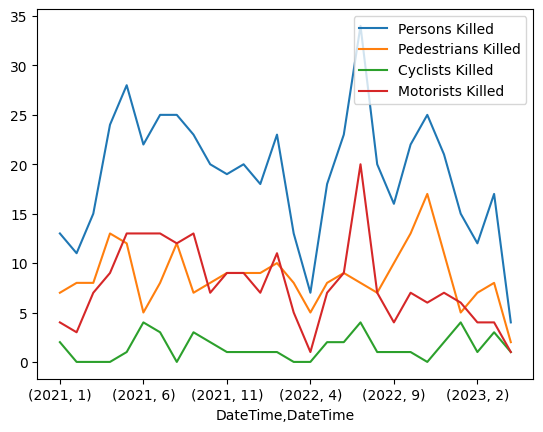

In [3]:
persons_killed = df.groupby([df["DateTime"].dt.year, df["DateTime"].dt.month])["Persons Killed"].sum()
pedestrians_killed = df.groupby([df["DateTime"].dt.year, df["DateTime"].dt.month])["Pedestrians Killed"].sum()
cyclists_killed = df.groupby([df["DateTime"].dt.year, df["DateTime"].dt.month])["Cyclists Killed"].sum()
motorists_killed = df.groupby([df["DateTime"].dt.year, df["DateTime"].dt.month])["Motorists Killed"].sum()

persons_killed.plot(x='Date', y='Persons Killed', legend=True)
pedestrians_killed.plot(x='Date', y='Pedestrians Killed', legend=True)
cyclists_killed.plot(x='Date', y='Pedestrians Killed', legend=True)
motorists_killed.plot(x='Date', y='Motorists Killed', legend=True)
plt.show()

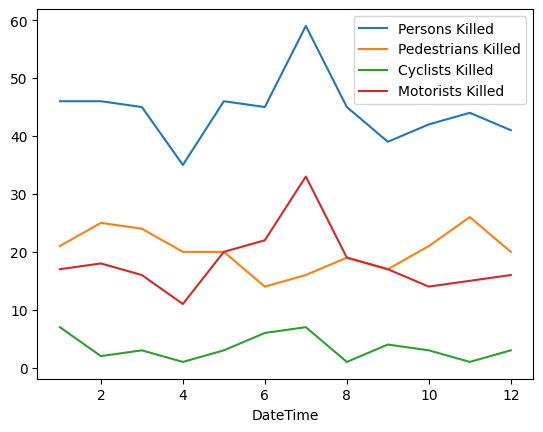

In [4]:
persons_killed = df.groupby([df["DateTime"].dt.month])["Persons Killed"].sum()
pedestrians_killed = df.groupby([df["DateTime"].dt.month])["Pedestrians Killed"].sum()
cyclists_killed = df.groupby([df["DateTime"].dt.month])["Cyclists Killed"].sum()
motorists_killed = df.groupby([df["DateTime"].dt.month])["Motorists Killed"].sum()

persons_killed.plot(x='Date', y='Persons Killed', legend=True)
pedestrians_killed.plot(x='Date', y='Pedestrians Killed', legend=True)
cyclists_killed.plot(x='Date', y='Pedestrians Killed', legend=True)
motorists_killed.plot(x='Date', y='Motorists Killed', legend=True)
plt.show()

<Axes: title={'center': 'Collisions per vehicle type'}, xlabel='Vehicle Type', ylabel='Num collisions'>

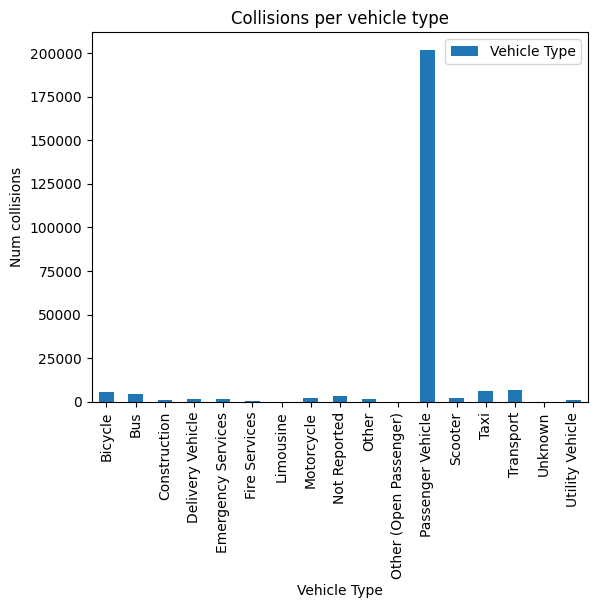

In [77]:
vehicle_type = df.groupby(df["Vehicle Type"])["Vehicle Type"].count()
vehicle_type.plot(kind='bar', ylabel='Num collisions', title='Collisions per vehicle type', legend=True)

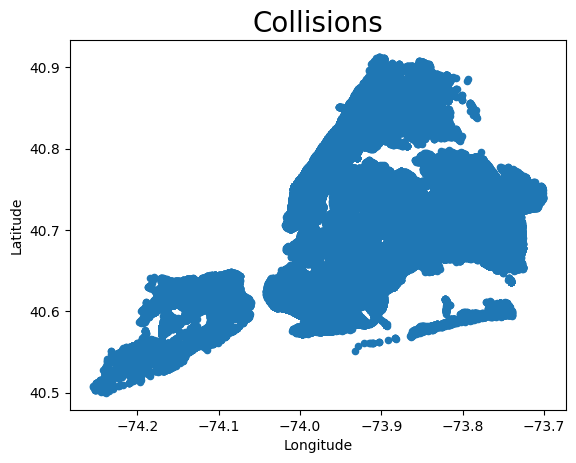

In [78]:
lat_long = df[["Latitude", "Longitude"]]
# lat_long.plot.scatter(y='Latitude', x='Longitude')
lat_long.plot(y='Latitude', x='Longitude', kind="scatter", legend=True)
# df.plot(y='Latitude', x='Longitude', kind="scatter")
plt.title('Collisions', fontsize=20) 
plt.show()

In [21]:
print('Min/max')
print('Latitude', lat_long["Latitude"].min(), '/', lat_long["Latitude"].max())
print('Longitude', lat_long["Longitude"].min(), '/', lat_long["Longitude"].max())

Min/max
Latitude 40.49971 / 40.912884
Longitude -74.25496 / -73.70061


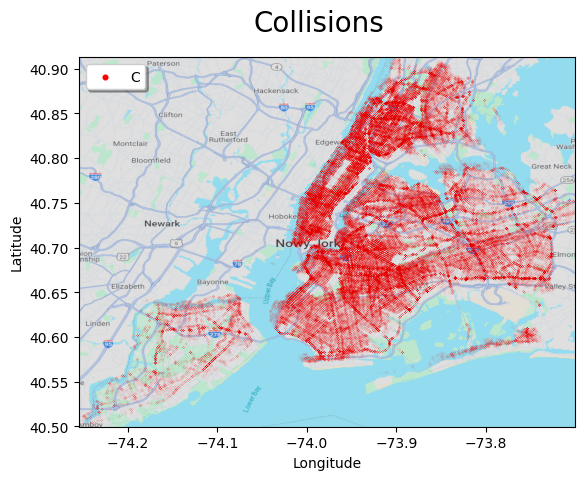

In [82]:
img = plt.imread("map.png")
fig, ax = plt.subplots() # figsize=(20, 10)
img = ax.imshow(img, extent=[-74.25496, -73.70061, 40.49971, 40.912884])
#lat_long_killed.plot.scatter(y='Latitude', x='Longitude', legend=True)
ax.scatter(lat_long["Longitude"], lat_long["Latitude"], color='red', s=0.0005, alpha=1)
fig.suptitle('Collisions', fontsize=20) 
ax.legend(labels=('Collisions'), loc='upper left', shadow=True, markerscale=150)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [23]:
lat_long_hour = df[["Latitude", "Longitude", "DateTime"]].copy()
lat_long_hour["Hour"] = lat_long_hour["DateTime"].dt.hour
# print(lat_long_datetime["DateTime"].dt.time.min())
# print(lat_long_datetime["DateTime"].dt.time.max())
# print(lat_long_datetime.groupby(lat_long_datetime["DateTime"].dt.hour).size())
# print("\n------------\n")
# print(lat_long_datetime.groupby(lat_long_datetime["DateTime"].dt.hour).head())
# print("\n------------\n")
# print(lat_long_datetime.groupby(lat_long_datetime["DateTime"].dt.hour).first())

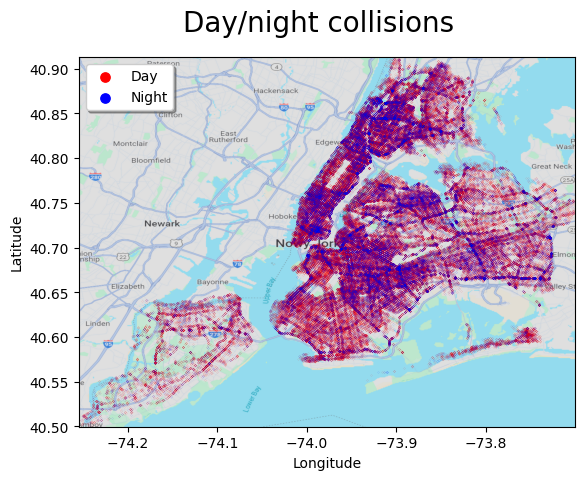

In [69]:
img = plt.imread("map.png")
fig, ax = plt.subplots() # figsize=(20, 10)
img = ax.imshow(img, extent=[-74.25496, -73.70061, 40.49971, 40.912884])

ax.scatter(lat_long_hour.loc[lat_long_hour["Hour"].between(6,20), "Longitude"], 
           lat_long_hour.loc[lat_long_hour["Hour"].between(6,20), "Latitude"], 
           s=0.002, 
           c='red')
ax.scatter(lat_long_hour.loc[(lat_long_hour["Hour"] < 6) | (lat_long_hour["Hour"] >20), "Longitude"], 
           lat_long_hour.loc[(lat_long_hour["Hour"] < 6) | (lat_long_hour["Hour"] >20), "Latitude"], 
           s=0.002, 
           c='blue')
# ax.scatter(lat_long_datetime["Longitude"], lat_long_datetime["Latitude"], s=0.0005, c='blue')
# fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(lat_long_datetime["DateTime"].min().value, 
#                                                              lat_long_datetime["DateTime"].max().value), cmap='viridis'), 
#              ax=ax, orientation='vertical', label='a colorbar label')
fig.suptitle('Day/night collisions', fontsize=20) 
ax.legend(labels=('Day', 'Night'), loc='best', shadow=True, markerscale=150)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [36]:
borough = df.loc[:, ['Borough', 'Latitude', 'Longitude']].copy()
print(borough.groupby(borough['Borough'])['Borough'].count())
print('\n------- NULLS\n')
print('Borough', borough['Borough'].isnull().sum())
print('Latitude', borough['Latitude'].isnull().sum())
print('Latitude', borough['Latitude'].isnull().sum())
print('\n-------\n')
print(borough.count())
print('\n-------\n')
borough.dropna(inplace=True)
borough.count()
print('\n-------\n')
borough.info()

Borough
Bronx            41255
Brooklyn         76416
Manhattan        38234
Queens           63751
Staten Island    11568
Name: Borough, dtype: int64

------- NULLS

Borough 7197
Latitude 22323
Latitude 22323

-------

Borough      231224
Latitude     216098
Longitude    216098
dtype: int64

-------


-------

<class 'pandas.core.frame.DataFrame'>
Index: 216098 entries, 0 to 238420
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Borough    216098 non-null  object 
 1   Latitude   216098 non-null  float64
 2   Longitude  216098 non-null  float64
dtypes: float64(2), object(1)
memory usage: 6.6+ MB


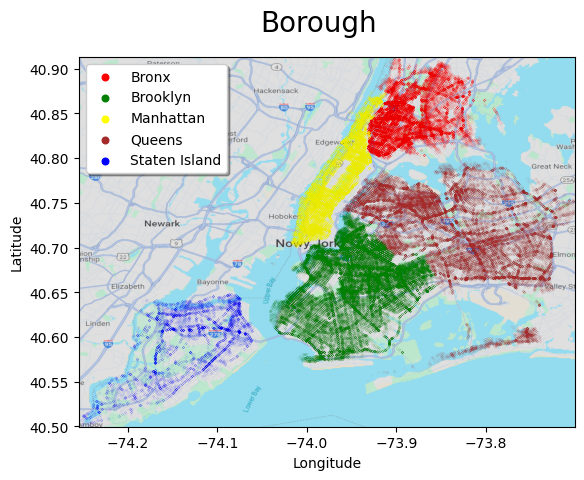

In [65]:
img = plt.imread("map.png")
fig, ax = plt.subplots() # figsize=(20, 10)
img = ax.imshow(img, extent=[-74.25496, -73.70061, 40.49971, 40.912884])

ax.scatter(borough.loc[borough["Borough"] == 'Bronx', "Longitude"], 
           borough.loc[borough["Borough"] == 'Bronx', "Latitude"], 
           s=0.001, 
           c='red')
ax.scatter(borough.loc[borough["Borough"] == 'Brooklyn', "Longitude"], 
           borough.loc[borough["Borough"] == 'Brooklyn', "Latitude"], 
           s=0.001, 
           c='green')
ax.scatter(borough.loc[borough["Borough"] == 'Manhattan', "Longitude"], 
           borough.loc[borough["Borough"] == 'Manhattan', "Latitude"], 
           s=0.001, 
           c='yellow')
ax.scatter(borough.loc[borough["Borough"] == 'Queens', "Longitude"], 
           borough.loc[borough["Borough"] == 'Queens', "Latitude"], 
           s=0.001, 
           c='brown')
ax.scatter(borough.loc[borough["Borough"] == 'Staten Island', "Longitude"], 
           borough.loc[borough["Borough"] == 'Staten Island', "Latitude"], 
           s=0.001, 
           c='blue')


# fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(lat_long_datetime["DateTime"].min().value, 
#                                                              lat_long_datetime["DateTime"].max().value), cmap='viridis'), 
#              ax=ax, orientation='vertical', label='a colorbar label')
fig.suptitle('Borough', fontsize=20) 
ax.legend(labels=('Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'), loc='best', shadow=True, markerscale=150)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [100]:
borough = df.loc[:, ['Borough', 'Latitude', 'Longitude']].copy()
print(borough.groupby(borough['Borough'])['Borough'].count())
print('\n------- NULLS\n')
print('Borough', borough['Borough'].isnull().sum())
print('Latitude', borough['Latitude'].isnull().sum())
print('Latitude', borough['Latitude'].isnull().sum())
print('\n-------\n')
print(borough.count())
print('\n-------\n')
borough.dropna(inplace=True)
print(borough.count())
print('\n-------\n')
borough.info()

Borough
Bronx            41255
Brooklyn         76416
Manhattan        38234
Queens           63751
Staten Island    11568
Name: Borough, dtype: int64

------- NULLS

Borough 7197
Latitude 22323
Latitude 22323

-------

Borough      231224
Latitude     216098
Longitude    216098
dtype: int64

-------

Borough      216098
Latitude     216098
Longitude    216098
dtype: int64

-------

<class 'pandas.core.frame.DataFrame'>
Index: 216098 entries, 0 to 238420
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Borough    216098 non-null  object 
 1   Latitude   216098 non-null  float64
 2   Longitude  216098 non-null  float64
dtypes: float64(2), object(1)
memory usage: 6.6+ MB


In [87]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# importing required packages for visualization
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz

# putting feature variable to x
x = borough.drop(['Borough'], axis=1)
# putting target variable to y
y = borough['Borough']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train, x_test, y_train, y_test

(         Latitude  Longitude
 161966  40.727665 -74.003180
 107472  40.850475 -73.915436
 134279  40.844486 -73.886920
 184421  40.592117 -73.787990
 227372  40.716003 -73.997340
 ...           ...        ...
 136788  40.678000 -73.860150
 148242  40.642630 -73.922890
 218941  40.693130 -73.969840
 43961   40.650670 -73.952480
 196367  40.862953 -73.890660
 
 [151268 rows x 2 columns],
          Latitude  Longitude
 216206  40.701054 -73.904730
 97576   40.741130 -73.989876
 104033  40.632990 -74.114160
 84546   40.802593 -73.951030
 3978    40.681740 -73.958590
 ...           ...        ...
 25745   40.788380 -73.947010
 144857  40.764362 -73.961620
 214008  40.717724 -73.985770
 230907  40.631440 -73.985115
 110820  40.694305 -73.918520
 
 [64830 rows x 2 columns],
 161966    Manhattan
 107472        Bronx
 134279        Bronx
 184421       Queens
 227372    Manhattan
             ...    
 136788       Queens
 148242     Brooklyn
 218941     Brooklyn
 43961      Brooklyn
 196367    

In [88]:
dt_borough = DecisionTreeClassifier()
dt_borough.fit(x_train, y_train)

DecisionTreeClassifier()

In [89]:
y_pred_train = dt_borough.predict(x_train)

In [90]:
print(classification_report(y_train, y_pred_train))

               precision    recall  f1-score   support

        Bronx       1.00      1.00      1.00     26306
     Brooklyn       1.00      1.00      1.00     51206
    Manhattan       1.00      1.00      1.00     25222
       Queens       1.00      1.00      1.00     41187
Staten Island       1.00      1.00      1.00      7347

     accuracy                           1.00    151268
    macro avg       1.00      1.00      1.00    151268
 weighted avg       1.00      1.00      1.00    151268



In [91]:
print(confusion_matrix(y_train, y_pred_train))
print(accuracy_score(y_train, y_pred_train))

[[26302     0     4     0     0]
 [    0 51202     0     4     0]
 [    2     0 25220     0     0]
 [    0    33     0 41154     0]
 [    0     0     0     0  7347]]
0.9997157363090674


In [92]:
y_pred_default = dt_borough.predict(x_test)

In [93]:
print(classification_report(y_test, y_pred_default))

               precision    recall  f1-score   support

        Bronx       1.00      1.00      1.00     11476
     Brooklyn       1.00      1.00      1.00     21799
    Manhattan       1.00      1.00      1.00     10734
       Queens       1.00      1.00      1.00     17737
Staten Island       1.00      1.00      1.00      3084

     accuracy                           1.00     64830
    macro avg       1.00      1.00      1.00     64830
 weighted avg       1.00      1.00      1.00     64830



In [18]:
print(confusion_matrix(y_test, y_pred_default))
print(accuracy_score(y_test, y_pred_default))

[[11197     0     6     0     0]
 [    0 21983     1     8     0]
 [    7     0 10796     0     0]
 [    0    24     3 17706     0]
 [    0     0     0     0  3099]]
0.999244177078513


In [94]:
import pydotplus

features = list(x_train.columns)
dot_data = StringIO()
export_graphviz(dt_borough, out_file=dot_data, feature_names=features, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph.write_pdf('borough.pdf') # file saved to currunt working directory
Image(graph.create_png())

In [97]:
y_pred = dt_borough.predict([[40.68, -73.97]])
y_pred

/root/Studia/python/analiza_danych/.venv/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Brooklyn'], dtype=object)

In [98]:
x_df = pd.DataFrame([[40.68, -73.97]], columns=['Latitude','Longitude'])
y_pred = dt_borough.predict(x_df)
y_pred

array(['Brooklyn'], dtype=object)